# Tracking A 
---------------------------------------------

In [18]:
from IPython.core.display import HTML
import numpy as np
import matplotlib
import scipy
from scipy.stats import norm
from scipy.stats import binom
import pandas as pd
params = {'figure.figsize':(12,6), # These are plot parameters
         'xtick.labelsize': 16,
         'ytick.labelsize':16,
         'axes.titlesize':18,
         'axes.labelsize':18,
         'lines.markersize':4,
         'legend.fontsize': 20}
matplotlib.rcParams.update(params)
from matplotlib import pyplot as plt
import random
from ipywidgets import *
import numpy.linalg
from IPython.display import display
from IPython.core.display import HTML
from notebook.nbextensions import enable_nbextension 
%matplotlib inline

print('The libraries loaded successfully')

The libraries loaded successfully


This chapter focuses on estimation.  An example is to estimate the location of an airplane given radar information and to update that estimate over time.  The mathematical formulation is least squares estimation. We start with the linear case.



## Linear Regression

You measure the weight $Y_n$ and the height $X_n$ of person $n$ for $n = 1, \ldots, N$.  Your goal is to undertand the relationship between these two quantities, so that by observing the height $X$ of new individual you could estimate her weight $Y$.  Ideally, you may want to discover a function $g(\cdot)$ such that $Y = g(X).$  However, this is clearly not possible since many people with the same height have widely different weights.  Thus, the best one can hope for is a function $g(\cdot)$ such that $g(X)$ is a good guess for $Y$.  Mathematically, we look for a function $g(\cdot)$ that minimizes $E((Y - g(X))^2)$.  As a first step, we look for a linear function $g(X) = a + bY$.  Thus, the problem is to choose $a$ and $b$ to minimize

$$\frac{1}{N} \sum_{n=1}^N (Y_n - a - bX_n)^2.$$

The solution is

$$g(X) = E_N(Y) + \frac{cov_N(Y, X)}{var_N(X)} (X - E_N(X)).$$

In this expression,

\begin{eqnarray*}
E_N(X) &=& \frac{1}{N} \sum_{n=1}^N X_n \\
E_N(Y) &=& \frac{1}{N} \sum_{n=1}^N Y_n \\
cov_N(X,Y) &=& \frac{1}{N} \sum_{n=1}^N X_n Y_n - E_N(X)E_N(Y) \\
var_N(X) &=& \frac{1}{N} \sum_{n=1}^N X^2_n - E_N(X)^2.
\end{eqnarray*}

That is, $E_N(X)$ is the sample mean of $X$, i.e., the arithmetic mean of the samples $X_n$.  Similarly, $cov_N(X,Y)$ is the sample covariance, etc. 

### Examples

In the code below, we provide some examples.  In case (a), the samples are positively correlated.  In case (b), they are negatively correlated. 

In [19]:
def dummy(Nd,cased):
    global N, case
    N, case = int(Nd), str(cased)

Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)
cased = widgets.ToggleButtons(options=['(a)', '(b)'],description='Case:',disabled=False,button_style='info',tooltip='Description')

z = widgets.interactive(dummy, Nd = Nd, cased=cased) 
display(z)

interactive(children=(Dropdown(description='N', index=4, options=('10', '30', '50', '70', '100', '150', '200',…

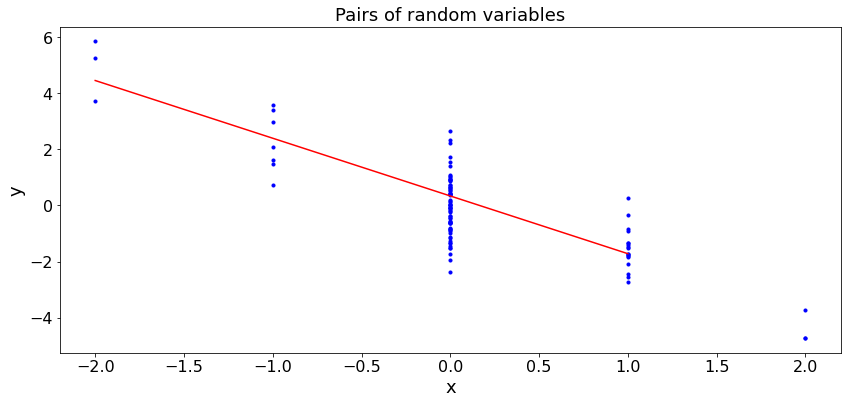

In [20]:
def LR(case,N):  # LR.  We write the code using basic operations.  Below, we write this using numpy functions.
    S = 100
    a = np.arange(N)
    b = np.zeros(N)
    c = np.arange(S)
    d = np.zeros(S)
    
    for k in range(N):
        a[k]= np.random.normal()
        if case == '(a)':
            b[k] =  2*a[k] +  1.5*np.random.normal()
        else:
            b[k] =  - 2*a[k] +  np.random.normal()
    EX, EY, CXY, VX = [0,0,0,0]
    for k in range(N):
        EX = EX + a[k]
        EY = EY + b[k]
        CXY = CXY + a[k]*b[k]
        VX = VX + a[k]**2
    EX = EX/N
    EY = EY/N
    CXY = CXY/N - EX*EY
    VX = VX/N - EX**2
    amin = min(a)
    amax = max(a)
    for s in range(S):
        c[s] = amin + s*(amax - amin)/S
        d[s] = EX + (CXY/VX)*(c[s]- EX)
    area = np.pi*3  
    plt.figure(figsize = (14,6))
    plt.scatter(a, b, s=area, c='b')
    plt.plot(c,d,c='r')
    plt.title('Pairs of random variables')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
            
case = widgets.ToggleButtons(options=['(a)', '(b)'],
    description='Case',
    disabled=False,
    button_style='info', 
    tooltip='Description',
#     icon='check'
) 


LR(case,N)

## Quadratic Regression

In many situations, the best linear regression is not a good approximation.  For instance, if you want to estimate the area of an almost corcular object based on its diameter, the best guess is probably proportional to the square of the diameter.  Similarly, the salary of someone increases faster than linearly with the number of years of schooling. (There are exceptions, like me.)

The **Quadratic Least Squares Regression (QR)** of $Y$ over $X$ is the function $Y = a + bX + cX^2$
where $(a, b, c)$ minimize the sum $C$ of the squares of the prediction errors where

$$C = \sum_{m=1}^n (Y_m - a - bX_m - cX_m^2)^2.$$

This is also the linear regression of $Y$ over $X$ and $X^2$.

As the book explains, $(a, b, c)$ are such that

$$\sum_{m=1}^n (Y_m - a - bX_m - cX_m^2) = 0$$

$$\sum_{m=1}^n (Y_m - a - bX_m - cX_m^2)X_m = 0$$

$$\sum_{m=1}^n (Y_m - a - bX_m - cX_m^2)X_m^2 = 0.$$


Thus, $(a, b, c)$ solve the following linear system of equations:

$$ \left[
\begin{array}{c c c}
n & \sum_m X_m & \sum_m X_m^2 \\
\sum_m X_m & \sum_m X_m^2 & \sum_m X_m^3 \\
\sum_m X_m^2 &  \sum_m X_m^3 & \sum_m X_m^4 
\end{array}
\right]
\left[
\begin{array}{c}
a \\
b \\
c
\end{array}
\right]
=
\left[
\begin{array}{c}
\sum_m Y_m \\
\sum_m Y_mX_m \\
\sum_m Y_mX_m^2
\end{array}
\right].
$$
Thus, one can solve these equations and get the QLR.  

### Examples

We plote the QPR and LR on the data $Y_n = 0.2 - X_n + 2X_n^2 + 1.3Z_n$ in case (a) and $Y_n = 0.4 + X_n - 2 X_n^2 + 1.3Z_n$ in case (b) where $X_n$ and $Z_n$ are i.i.d. ${\cal N}(0, 1)$.  First, we write the code in long form. 


In [21]:
def dummy(Nd,cased):
    global N, case
    N, case = int(Nd), str(cased)

Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)
cased = widgets.ToggleButtons(options=['(a)', '(b)'],description='Case:',disabled=False,button_style='info',tooltip='Description')

z = widgets.interactive(dummy, Nd = Nd, cased=cased) 
display(z)

interactive(children=(Dropdown(description='N', index=4, options=('10', '30', '50', '70', '100', '150', '200',…

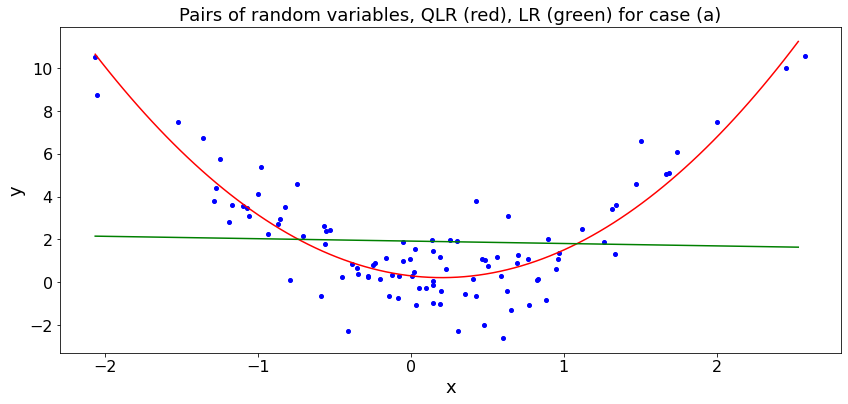

In [22]:
def QR(case,N):  # Simulation of QR.  
    S = 100
    a = np.arange(0.0,N)
    b = np.arange(0.0,N)
    c = np.arange(0.0,S)
    d = np.arange(0.0,S)
    e = np.arange(0.0,S)
    
    for k in range(N):
        a[k]= np.random.normal()
        if case == '(a)':
            case_str = '(a)'
            b[k] =  0.2 - a[k] +  2*a[k]**2 + 1.3*np.random.normal()
        else:
            case_str = '(b)'
            b[k] =  0.4 + a[k] -  2*a[k]**2 + 1.3*np.random.normal()
    Sx = 0
    Sx2 = 0
    Sx3 = 0
    Sx4 = 0
    Sy = 0
    Sxy = 0
    Sx2y = 0
    for k in range(N):
        Sx = Sx + a[k]
        Sx2 = Sx2 + a[k]**2
        Sx3 = Sx3 + a[k]**3
        Sx4 = Sx4 + a[k]**4
        Sy = Sy + b[k]
        Sxy = Sxy + a[k]*b[k]
        Sx2y = Sx2y + a[k]**2*b[k]
    A = [[N,Sx,Sx2],[Sx,Sx2,Sx3],[Sx2,Sx3,Sx4]]
    Ainv = np.linalg.inv(A)
    V = [Sy, Sxy, Sx2y]
    W = np.dot(Ainv,V)
    AL = [[N, Sx],[Sx, Sx2]]
    ALinv = np.linalg.inv(AL)
    VL = [Sy, Sxy]
    WL = np.dot(ALinv,VL)
    amin = min(a)
    amax = max(a)
    for s in range(S):
        c[s] = amin + s*(amax - amin)/S
        d[s] = W[0]+c[s]*W[1]+W[2]*c[s]**2
        e[s] = WL[0] + c[s]*WL[1]
    plt.figure(figsize = (14,6))
    plt.scatter(a, b,c='b')
    plt.plot(c,d,c='r')
    plt.plot(c,e,c='g')
    plt.title('Pairs of random variables, QLR (red), LR (green) for case ' + case_str)
    plt.xlabel('x')
    plt.ylabel('y')
               

QR(case,N)

### Polyfit

In the next cell, we write the polynomial fit using numpy.polyfit.

In [23]:
def dummy(Nd,cased):
    global N, case
    N, case = int(Nd), str(cased)

Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)
cased = widgets.ToggleButtons(options=['(a)', '(b)'],description='Case:',disabled=False,button_style='info',tooltip='Description')

z = widgets.interactive(dummy, Nd = Nd, cased=cased) 
display(z)

interactive(children=(Dropdown(description='N', index=4, options=('10', '30', '50', '70', '100', '150', '200',…

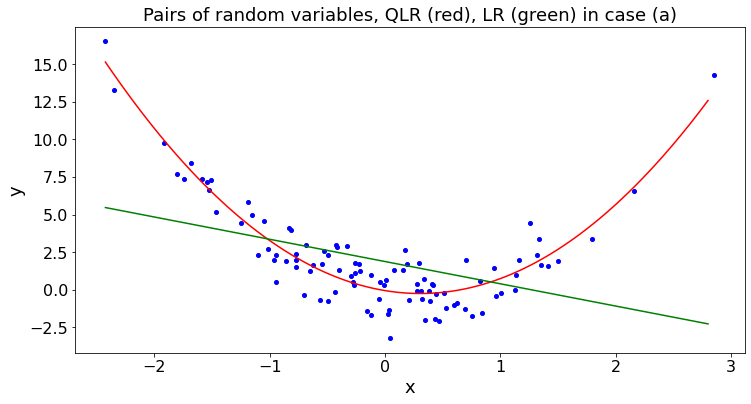

In [25]:
matplotlib.rcParams.update(params)
def QR2(case,N):  # Simulation of QR. Here, we use polyfit 
    # First we generate the random variables
    S = 100
    a,b,c,d = np.zeros([4,N])
    for k in range(N):
        a[k]= np.random.normal()
        if case == '(a)':
            case_str = '(a)'
            b[k] =  0.2 - a[k] +  2*a[k]**2 + 1.3*np.random.normal()
        else:
            case_str = '(b)'
            b[k] =  0.4 + a[k] -  2*a[k]**2 + 1.3*np.random.normal()
    p2 = np.polyfit(a,b,2) # quadratic fit
    p1 = np.polyfit(a,b,1) #t linear fit
    
    # We draw the quadratic and the line
    amin = min(a)
    amax = max(a)
    e = np.zeros(S)
    for s in range(S):
        c[s] = amin + s*(amax - amin)/S
        d[s] = p2[2]+ p2[1]*c[s]+ p2[0]*c[s]**2
        e[s] = p1[1] + p1[0]*c[s]
    plt.scatter(a, b, c='b')   
    plt.plot(c,d,c='r')
    plt.plot(c,e,c='g')
    plt.title('Pairs of random variables, QLR (red), LR (green) in case ' + case_str)
    plt.xlabel('x')
    plt.ylabel('y')
               
QR2(case,N)

### Pandas and Polyfit

Let's use pandas and polyfit to calculate the linear and quadratic regression of weights over height.  We use the data in the file HW.xlsx.  We explained the conversion of the spreadsheet to a Dataframe in Chapter0.

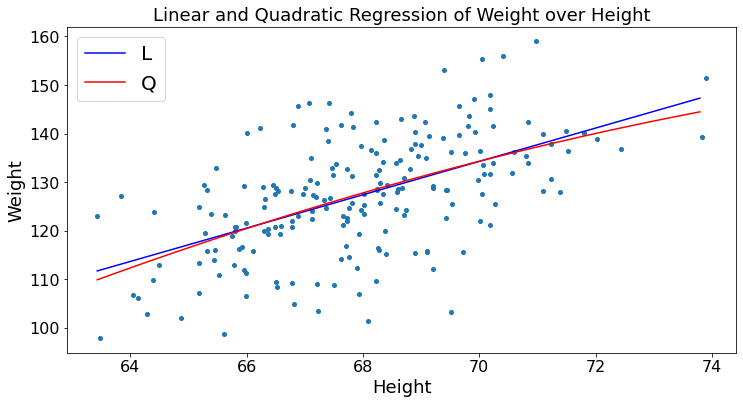

In [27]:
HW_df = pd.read_excel('HW.xlsx',index_col = 0)
H = HW_df.iloc[:,0]
W = HW_df.iloc[:,1]
p2 = np.polyfit(H,W,2) # quadratic fit
p1 = np.polyfit(H,W,1) #t linear fit
H_min = min(H)
H_max = max(H)
x,L,Q = np.zeros([3,100])
nSet = np.arange(100)
x = [H_min + n*(H_max - H_min)/100 for n in nSet]
Q = [p2[2] + p2[1]*x[n] + p2[0]*x[n]**2 for n in nSet]
L = [p1[1] + p1[0]*x[n] for n in nSet]
plt.ylabel("Weight")
plt.xlabel("Height")
plt.title("Linear and Quadratic Regression of Weight over Height")
plt.scatter(H, W)
plt.plot(x, L, color='blue',label='L')
plt.plot(x, Q, color='red', label='Q')
plt.legend()
plt.show()

## Kalman Filter

You will recall the model described in the book:

$$X(n+1) = AX(n) + V(n)$$

$$Y(n) = CX(n) + W(n).$$


In these expressions, $X$ and $Y$ are vectors and $V, W$ are uncorrelated across time, zero mean. Also,
$V(n)$ and $W(n)$ are uncorrelated and have covariance matrices $\Sigma_V$ and $\Sigma_W$.
We assume that $X(0)$ is zero-mean and has covariance $\Sigma_0$.  

The goal is to calculate $\bar X(n) = L[X(n) | Y^n]$ recursively, where $Y^n = \{Y(0), \ldots, Y(n)\}$.  The Kalman Filter is as follows:

$$\bar X(n) = A \bar X(n-1) + K_n [Y(n) - CA \bar X(n-1)] \tag{7.1}$$

$$K_n = S_nC'[CS_nC' + \Sigma_W]^{-1} \tag{7.2}$$

$$S_n = A \Sigma_{n-1} A' + \Sigma_V \tag{7.3} $$

$$ \Sigma_n = (I - K_nC)S_n. \tag{7.4}$$


Moreover, $\Sigma_n = cov(X(n) - \bar X(n))$.

### Examples

In the simulations below, we explore the four examples shown in the book:

**Example 1**:  Random walk with noisy observations.  By choice, we start the walk in $X(0) = 20$ even though it is assume to have zero mean.

$$X(n+1) = X(n) + V(n) $$

$$Y(n) = X(n) + W(n) $$

$$var(V(n)) = varV, var(W(n)) = varW.$$


In [30]:
def dummy(varVd,varWd):
    global varV, varW
    varV, varW = float(varVd), float(varWd)

varVd = widgets.Dropdown(options=['0.2', '0.4', '0.6', '0.8','1','1.2','1.4','1.6','1.8','2','2.2','2.4','2.6','2.8','3','3.2','3.4','3.6','3.8','4','4.2','4.4','4.6','4.8','5','5.2'],value='2',description='varV',disabled=False)
varWd = widgets.Dropdown(options=['0.2', '0.4', '0.6', '0.8','1','1.2','1.4','1.6','1.8','2','2.2','2.4','2.6','2.8','3','3.2','3.4','3.6','3.8','4','4.2','4.4','4.6','4.8','5','5.2'],value='4',description='varW',disabled=False)

z = widgets.interactive(dummy, varVd = varVd, varWd = varWd) 
display(z)

interactive(children=(Dropdown(description='varV', index=9, options=('0.2', '0.4', '0.6', '0.8', '1', '1.2', '…

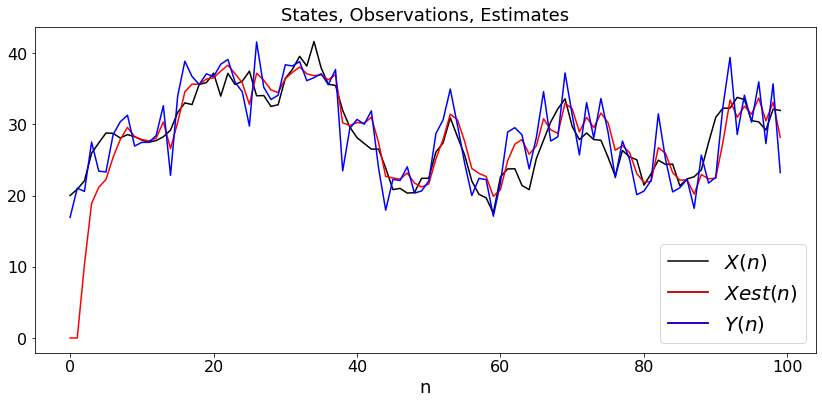

In [31]:
def KF1(v,w): 
    N = 100
    t = np.arange(0,N)
    X = np.arange(0.0,N)
    Xb = np.arange(0.0,N)
    Sigma = v
    S = 0
    K = S/(S + w)
    
    
    Y = np.arange(0.0,N)
    X[0] = 20
    Xb[0] = 0
    Y[0] = X[0] + w*np.random.normal()
    
    
    for k in range(1,N):
        X[k]= X[k-1] + v*np.random.normal()
        Y[k] = X[k] + w*np.random.normal() 
        Xb[k] = Xb[k-1] + K*(Y[k] - Xb[k-1])
        S = Sigma + v
        K = S/(S + w)
        Sigma = (1 - K)*S
    
    plt.figure(figsize = (14,6))
    plX, = plt.plot(t,X,'black')
    plXb, =plt.plot(t,Xb,'r')
    plY, = plt.plot(t,Y,'blue')
    plt.title('States, Observations, Estimates')
    plt.xlabel('n')
    plt.legend([plX, (plX, plXb), (plX, plXb, plY)], ["$X(n)$", "$Xest(n)$","$Y(n)$"])
            

KF1(varV,varW)


**Example 2**:  Random walk with unknown drift

$$X_1(n+1) = X_1(n) + X_2(n) + V(n)$$

$$X_2(n+1) = X_2(n) $$

$$Y(n) = X_1(n) + W(n)$$

$$ var(V(n)) = varV, var(W(n)) = varW.$$


In [32]:
def dummy(varVd,varWd):
    global varV, varW
    varV, varW = float(varVd), float(varWd)

varVd = widgets.Dropdown(options=['0.2', '0.4', '0.6', '0.8','1','1.2','1.4','1.6','1.8','2','2.2','2.4','2.6','2.8','3','3.2','3.4','3.6','3.8','4','4.2','4.4','4.6','4.8','5','5.2'],value='2',description='varV',disabled=False)
varWd = widgets.Dropdown(options=['0.2', '0.4', '0.6', '0.8','1','1.2','1.4','1.6','1.8','2','2.2','2.4','2.6','2.8','3','3.2','3.4','3.6','3.8','4','4.2','4.4','4.6','4.8','5','5.2'],value='4',description='varW',disabled=False)

z = widgets.interactive(dummy, varVd = varVd, varWd = varWd) 
display(z)

interactive(children=(Dropdown(description='varV', index=9, options=('0.2', '0.4', '0.6', '0.8', '1', '1.2', '…

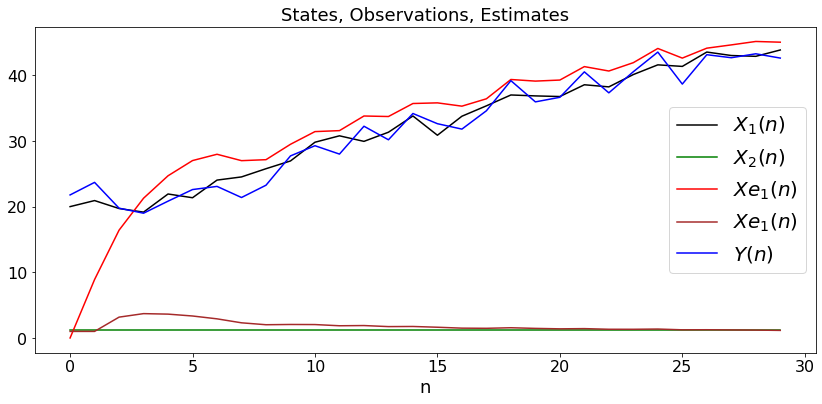

In [33]:
def KF2(v,w): 
    N = 30
    t = np.arange(0,N)
    X = np.zeros((2,N))
    Xb = np.zeros((2,N))
    Y = np.arange(0.0,N)
    C = np.array([[1, 0]])
    S = np.array([[v, 0],[0,v]])
    K = np.dot(S,C.transpose())/(S[0,0] + w)
    A = np.array([[1, 1],[0,1]])    
    Sv = np.array([[v, 0],[0,0]])
    Sx = S
    Sw = w
    X[0,0] = 20
    X[1,0] = 1.2
    Xb[0,0] = 0
    Xb[1,0] = 1
    Y[0] = X[0,0] + w*np.random.normal()
        
    for k in range(1,N):
        X[0,k]= (np.dot(A,X[:,k-1]))[0] + v**0.5*np.random.normal()
        X[1,k]= (np.dot(A,X[:,k-1]))[1] 
        Y[k] = X[0,k] + w**0.5*np.random.normal() 
        for i in range(2):
            Xb[i,k] = np.dot(A,Xb[:,k-1])[i] + (K*(Y[k]- Xb[0,k-1]))[i]
        S = np.dot(A,np.dot(Sx, A.T)) + Sv
        K = np.dot(S,C.T)/(S[0,0] + w)
        Sx = np.dot((np.identity(2) - np.dot(K,C)),S)    
    plt.figure(figsize = (14,6))
    plX0, = plt.plot(t,X[0,:],'black',label='$X_1(n)$')
    plt.legend()
    plX1, = plt.plot(t,X[1,:],'green',label='$X_2(n)$')
    plt.legend()
    plXb0, = plt.plot(t,Xb[0,:],'r', label ='$Xe_1(n)$')
    plt.legend()
    plXb1, = plt.plot(t,Xb[1,:],'brown', label ='$Xe_1(n)$')
    plt.legend()
    plY, = plt.plot(t,Y,'blue', label='$Y(n)$')
    plt.legend()
    plt.title('States, Observations, Estimates')
    plt.xlabel('n')
    
KF2(varV,varW)

**Example 3**:  Random walk with changing drift

$$X_1(n+1) = X_1(n) + X_2(n) + V_1(n) $$

$$X_2(n+1) = X_2(n) + V_2(n) $$

$$Y(n) = X_1(n) + W(n)$$

$$var(V_1(n)) = varV1, var(V_2(n)) = varV2, var(W(n)) = varW.$$

In [35]:
def dummy(varV1d,varV2d,varWd):
    global varV1, varV2, varW
    varV1, varV2, varW = float(varV1d), float(varV2d),float(varWd)

varV1d = widgets.Dropdown(options=['0.2', '0.4', '0.6', '0.8','1','1.2','1.4','1.6','1.8','2','2.2','2.4','2.6','2.8','3','3.2','3.4','3.6','3.8','4','4.2','4.4','4.6','4.8','5','5.2'],value='2',description='varV1',disabled=False)
varV2d = widgets.Dropdown(options=['0.2', '0.4', '0.6', '0.8','1','1.2','1.4','1.6','1.8','2','2.2','2.4','2.6','2.8','3','3.2','3.4','3.6','3.8','4','4.2','4.4','4.6','4.8','5','5.2'],value='2',description='varV2',disabled=False)
varWd = widgets.Dropdown(options=['0.2', '0.4', '0.6', '0.8','1','1.2','1.4','1.6','1.8','2','2.2','2.4','2.6','2.8','3','3.2','3.4','3.6','3.8','4','4.2','4.4','4.6','4.8','5','5.2'],value='4',description='varW',disabled=False)

z = widgets.interactive(dummy, varV1d = varV1d, varV2d = varV2d, varWd = varWd) 
display(z)

interactive(children=(Dropdown(description='varV1', index=9, options=('0.2', '0.4', '0.6', '0.8', '1', '1.2', …

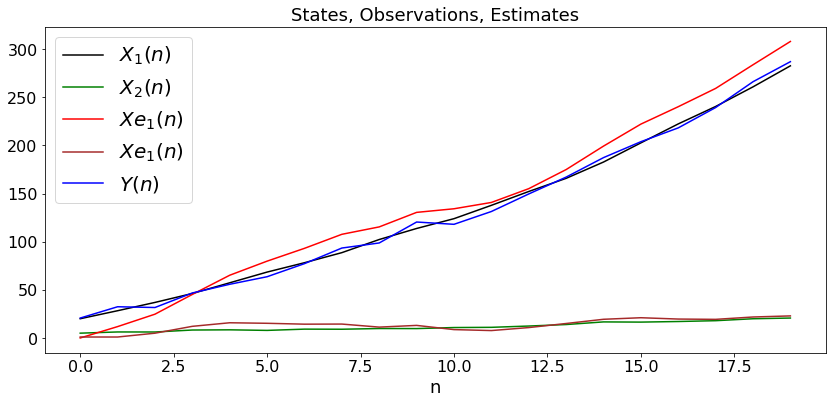

In [36]:
def KF3(v1,v2,w): 
    N = 20
    t = np.arange(0,N)
    X = np.zeros((2,N))
    Xb = np.zeros((2,N))
    Y = np.arange(0.0,N)
    C = np.array([[1, 0]])
    S = v1*np.identity(2)
    K = np.dot(S,C.transpose())/(S[0,0] + w)
    A = np.array([[1, 1],[0,1]])    
    Sv = np.array([[v1, 0],[0,v2]])
    Sx = Sv
    Sw = w
    X[0,0] = 20
    X[1,0] = 5
    Xb[0,0] = 0
    Xb[1,0] = 1
    Y[0] = X[0,0] + w**0.5*np.random.normal()
        
    for k in range(1,N):
        X[:,k]= np.dot(A,X[:,k-1]) + np.random.normal((2,1))
        Y[k] = X[0,k] + w*np.random.normal() 
        for i in range(2):
            Xb[i,k] = np.dot(A,Xb[:,k-1])[i] + (K*(Y[k]- Xb[0,k-1]))[i]
        S = np.dot(A,np.dot(Sx, A.T)) + Sv
        K = np.dot(S,C.T)/(S[0,0] + w)
        Sx = np.dot((np.identity(2) - np.dot(K,C)),S)    
    plt.figure(figsize = (14,6))
    plX0, = plt.plot(t,X[0,:],'black',label='$X_1(n)$')
    plt.legend()
    plX1, = plt.plot(t,X[1,:],'green',label='$X_2(n)$')
    plt.legend()
    plXb0, = plt.plot(t,Xb[0,:],'r', label ='$Xe_1(n)$')
    plt.legend()
    plXb1, = plt.plot(t,Xb[1,:],'brown', label ='$Xe_1(n)$')
    plt.legend()
    plY, = plt.plot(t,Y,'blue', label='$Y(n)$')
    plt.legend()
    plt.title('States, Observations, Estimates')
    plt.xlabel('n')
    
KF3(varV1,varV2,varW)
        

**Example 4**:  Falling Object

$$X_1(n+1) = X_1(n) + X_2(n) + V(n) $$

$$X_2(n+1) = X_2(n) $$

$$ Y(n) = X_1(n) + W(n) $$

$$ Z(n) = X_1(n) - 0.5gn^2 $$

$$ \bar Z(n) = \bar X_1(n) - 0.5gn^2 $$

$$var(V(n)) = varV, var(W(n)) = varW.$$

In this expression, $g$ is the gravitation constant normalized for the unit of time.

In [37]:
def dummy(varVd,varWd):
    global varV, varW
    varV, varW = float(varVd), float(varWd)

varVd = widgets.Dropdown(options=['0.2', '0.4', '0.6', '0.8','1','1.2','1.4','1.6','1.8','2','2.2','2.4','2.6','2.8','3','3.2','3.4','3.6','3.8','4','4.2','4.4','4.6','4.8','5','5.2'],value='2',description='varV',disabled=False)
varWd = widgets.Dropdown(options=['0.2', '0.4', '0.6', '0.8','1','1.2','1.4','1.6','1.8','2','2.2','2.4','2.6','2.8','3','3.2','3.4','3.6','3.8','4','4.2','4.4','4.6','4.8','5','5.2'],value='4',description='varW',disabled=False)

z = widgets.interactive(dummy, varVd = varVd, varWd = varWd) 
display(z)

interactive(children=(Dropdown(description='varV', index=9, options=('0.2', '0.4', '0.6', '0.8', '1', '1.2', '…

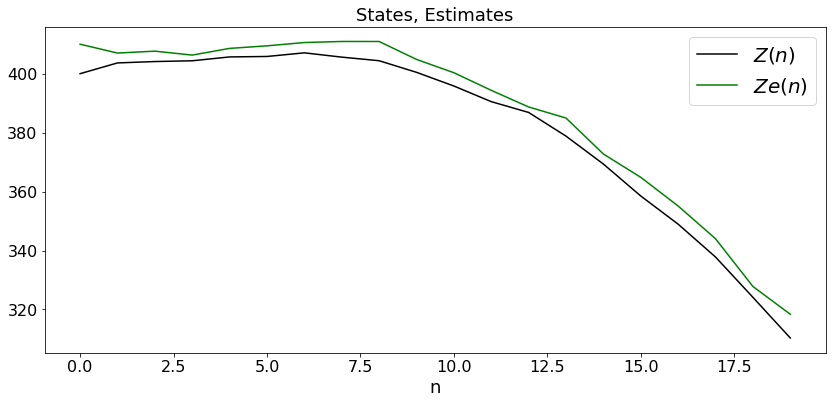

In [38]:
def KF4(v,w): 
    N = 20
    t = np.arange(0,N)
    X = np.zeros((2,N))
    Xb = np.zeros((2,N))
    Y = np.arange(0.0,N)
    Z = np.arange(0.0,N)
    Zb = np.arange(0.0,N)
    C = np.array([[1, 0]])
    S = np.array([[v, 0],[0,v]])
    K = np.dot(S,C.transpose())/(S[0,0] + w)
    A = np.array([[1, 1],[0,1]])    
    Sv = np.array([[v, 0],[0,0]])
    Sx = S
    Sw = w
    X[0,0] = 400
    Z[0] = X[0,0]
    X[1,0] = 1.2
    Xb[0,0] = 410
    Zb[0] = Xb[0,0]
    Xb[1,0] = 1
    g = 2
    Y[0] = X[0,0] + w**0.5*np.random.normal()
        
    for k in range(1,N):
        X[:,k]= np.dot(A,X[:,k-1]) + np.random.normal((2,1))
        Z[k] = X[0,k] - 0.5*g*k**2
        Y[k] = X[0,k] + w*np.random.normal() 
        for i in range(2):
            Xb[i,k] = np.dot(A,Xb[:,k-1])[i] + (K*(Y[k]- Xb[0,k-1]))[i]
        Zb[k] = Xb[0,k]- 0.5*g*k**2
        S = np.dot(A,np.dot(Sx, A.T)) + Sv
        K = np.dot(S,C.T)/(S[0,0] + w)
        Sx = np.dot((np.identity(2) - np.dot(K,C)),S)    
    plt.figure(figsize = (14,6))
    plX0, = plt.plot(t,Z,'black',label='$Z(n)$')
    plt.legend()
    plX1, = plt.plot(t,Zb,'green',label='$Ze(n)$')
    plt.legend()
    plt.title('States, Estimates')
    plt.xlabel('n')

KF4(varV,varW)       